In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load file
file_name = '..\coadded_1dspec'
file = fits.open(file_name+'.fits')
print(file.info())

Filename: ..\coadded_1dspec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  SPECTRUM      1 BinTableHDU     33   3403R x 5C   [1D, 1D, 1D, 1D, 1K]   
None


In [3]:
data = file[1].data
print(data.columns)

ColDefs(
    name = 'wave'; format = '1D'
    name = 'wave_grid_mid'; format = '1D'
    name = 'flux'; format = '1D'
    name = 'ivar'; format = '1D'
    name = 'mask'; format = '1K'
)


In [4]:
wave = data.wave
flux = data.flux
noise = 1./np.sqrt(data.ivar)

In [5]:
def binner(wave, flux, noise, binfactor):
    subarray_flux = flux[:(flux.size // binfactor) * binfactor].reshape(-1, binfactor)
    subarray_noise = noise[:(noise.size // binfactor) * binfactor].reshape(-1, binfactor)
    wavebin = wave[:(wave.size // binfactor) * binfactor].reshape(-1, binfactor).mean(axis=1)

    fluxbin = np.average(subarray_flux, weights=1/(subarray_noise)**2, axis=1)
    noisebin = np.sqrt(1/((1/subarray_noise**2).sum(axis=1)))
    return wavebin, fluxbin, noisebin

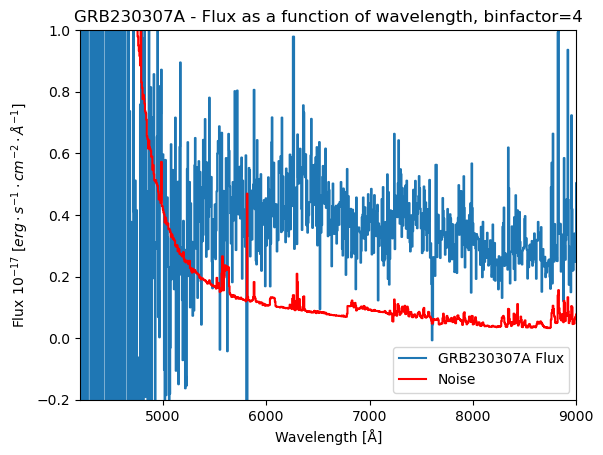

In [6]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 4)

plt.figure()
#plt.step(wave,flux)
#plt.step(wave,noise,color='red')
plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(4))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(4200,9000.)
plt.ylim(-0.2,1.)
plt.legend()
plt.show()

# Manual Line Identification

Identifying absorption lines by looking at absorption features that (somewhat)  distinguishes from background noise in flux level (Manual identification!)

In [7]:
def Identified_lines(plot=True):
    lines = [5060, 5224, 5295, 5370, 5550, 5625, 
             5812, 6041, 6297, 6411, 6523, 6594, 
             6740, 6769, 6823, 6868, 6913, 7042, 
             7083, 7124, 7177, 7607, 8032, 8201, 
             8282, 8358, 8472, 8938
            ]
    if plot==True:
        ymax_arr = [0.35, 0.46, 0.53, 0.53, 0.49, 
                   0.49, 0.35, 0.55, 0.55, 0.53, 
                   0.535, 0.55, 0.55, 0.53, 0.53, 
                   0.53, 0.53, 0.54, 0.535, 0.535, 
                   0.53, 0.51, 0.535, 0.535, 0.53, 
                   0.53, 0.53, 0.505
                   ]
        for i in range(len(lines)):
            plt.axvline(lines[i], ymin=0, ymax=ymax_arr[i], color="black", linestyle="--", linewidth=2)
    return lines

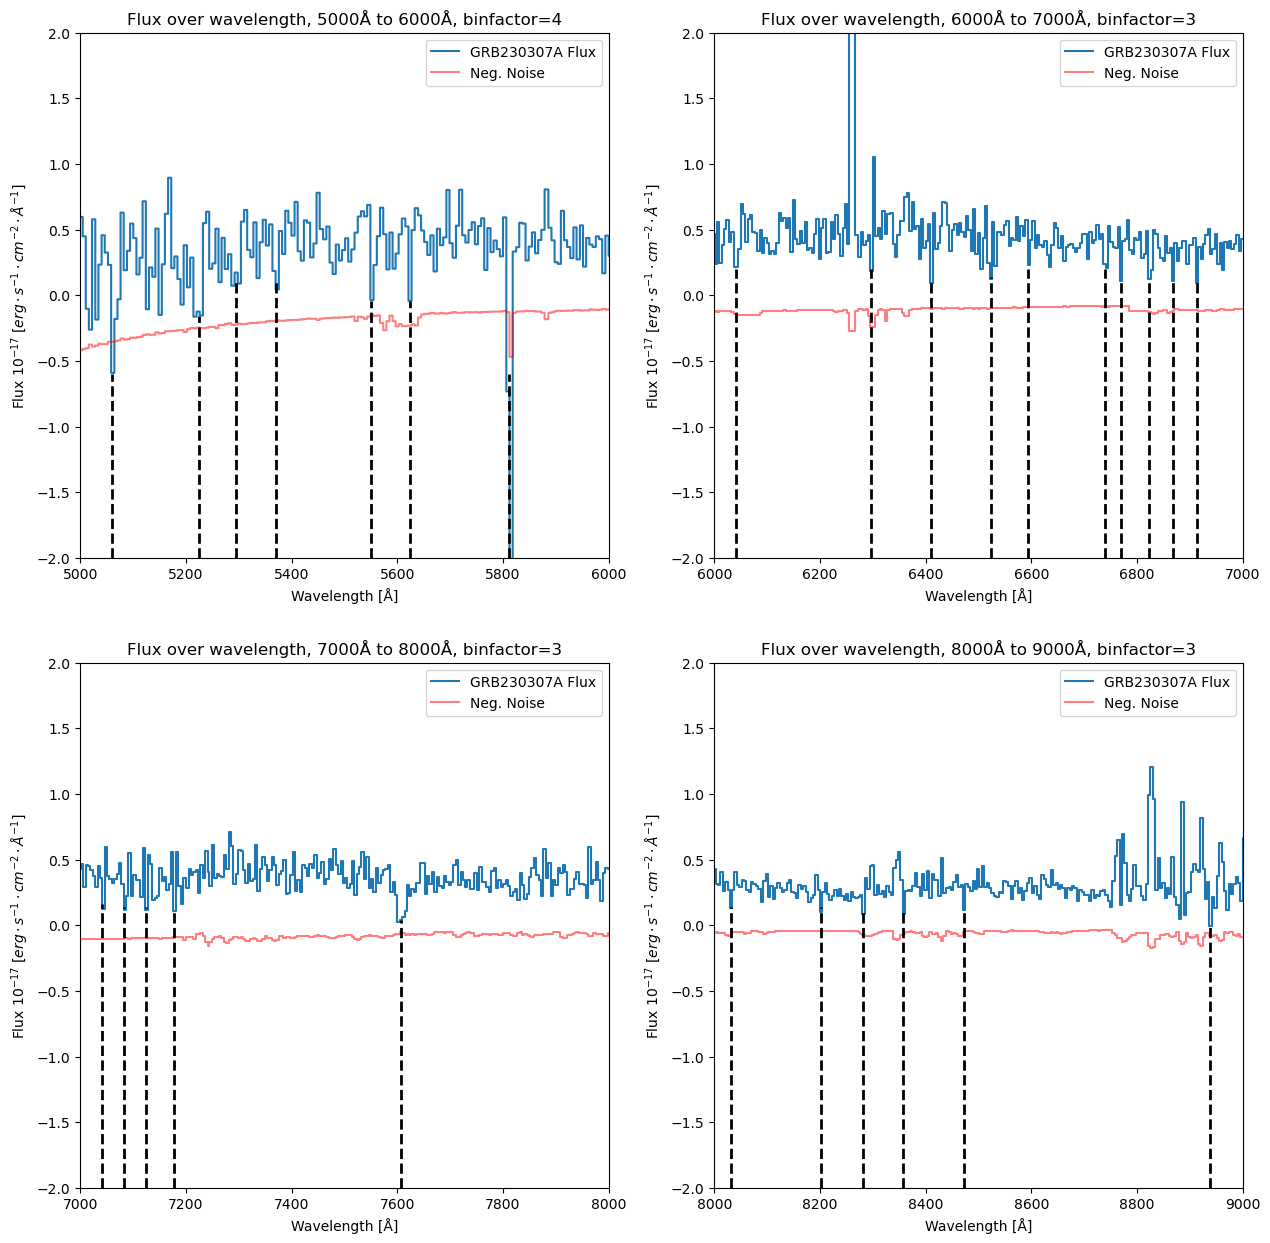

In [8]:
fig = plt.figure(figsize=(15, 15))
rows = 2
columns = 2

j = 1
binfactor_array = [4, 3, 3, 3]

for i in range(5000, 9000, 1000):
    wave_min = i
    wave_max = i+1000
    
    wavebin, fluxbin, noisebin = binner(wave, flux, noise, binfactor=binfactor_array[j-1])
        
    fig.add_subplot(rows, columns, j)
    plt.title("Flux over wavelength, {}Å to {}Å, binfactor={}".format(wave_min, wave_max, binfactor_array[j-1]))
    plt.xlabel("Wavelength [Å]")
    plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
    plt.step(wavebin,fluxbin, label="GRB230307A Flux")
    plt.step(wavebin,-noisebin,color='red', label="Neg. Noise", alpha=0.5)
    plt.xlim(wave_min,wave_max)
    plt.ylim(-2,2)
    Identified_lines()
    
    plt.legend()
    j += 1

plt.show()

# Approximate uncertainty from binsize

In [9]:
wavebin, ____, _____ = binner(wave, flux, noise, 4)

wavebin_diff = np.array([])

for i in range(1, len(wavebin)):
    wavebin_diff = np.append(wavebin_diff, wavebin[i]-wavebin[i-1])

median_abs_sigma_4 = np.median(wavebin_diff)
    

print("Binfactor=4 median uncertainty: " + " +-" + str(round(median_abs_sigma_4, 1)) + "Å")

Binfactor=4 median uncertainty:  +-6.0Å


In [10]:
wavebin, ____, _____ = binner(wave, flux, noise, 3)

wavebin_diff = np.array([])

for i in range(1, len(wavebin)):
    wavebin_diff = np.append(wavebin_diff, wavebin[i]-wavebin[i-1])

median_abs_sigma_3 = np.median(wavebin_diff)
    

print("Binfactor=4 median uncertainty: " + " +-" + str(round(median_abs_sigma_3, 1)) + "Å")

Binfactor=4 median uncertainty:  +-4.5Å


# ~5060Å

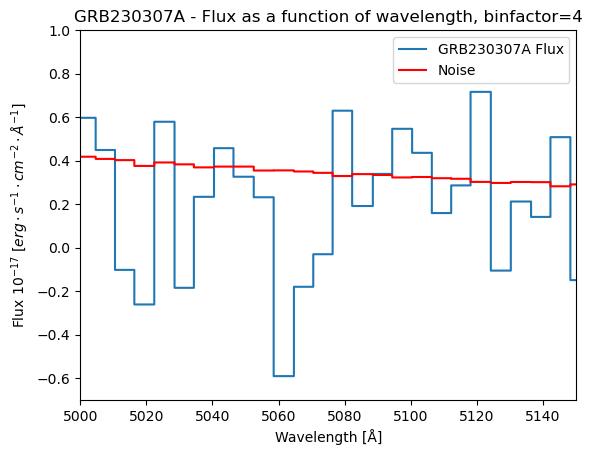

In [11]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 4)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(4))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(5000,5150.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

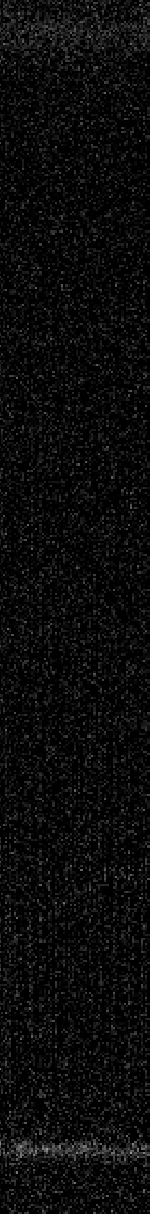

No clear absorption line in transient 2D spectrum!

In [12]:
print("Abs. feature wavelength: " + str(round(wavebin[210], 0)) + "Å +- " + str(round(median_abs_sigma_4, 0)) + "Å") 

Abs. feature wavelength: 5376.0Å +- 6.0Å


# ~5224Å

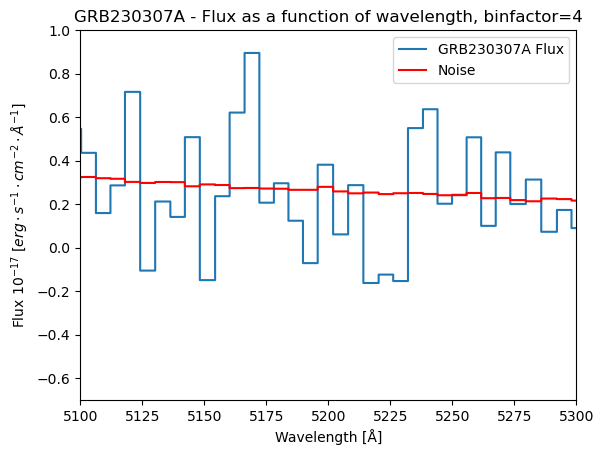

In [13]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 4)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(4))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(5100,5300.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

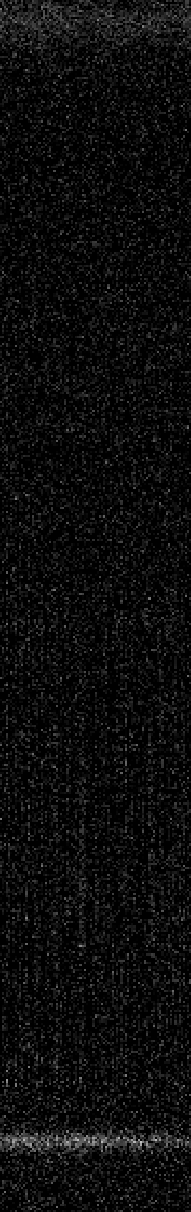

No clear absorption line in transient 2D spectrum!

In [14]:
print("Abs. feature wavelength: " + str(round(wavebin[184], 0)) + "Å +- " + str(round(median_abs_sigma_4, 0)) + "Å") 

Abs. feature wavelength: 5220.0Å +- 6.0Å


# ~5295 Å

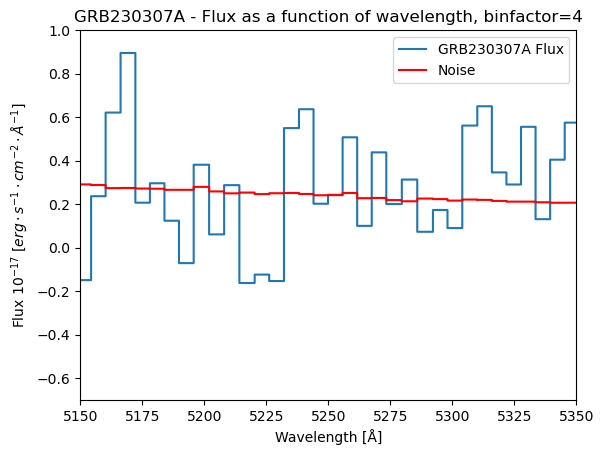

Abs. feature wavelength: 5298.0Å +- 6.0Å


In [15]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 4)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(4))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(5150,5350.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[197], 0)) + "Å +- " + str(round(median_abs_sigma_4, 0)) + "Å") 

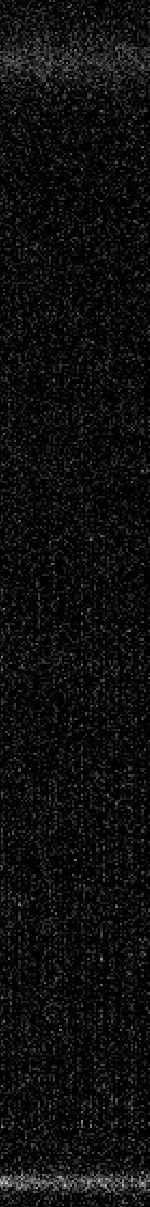

No clear absorption line in transient 2D spectrum!

# ~5370Å

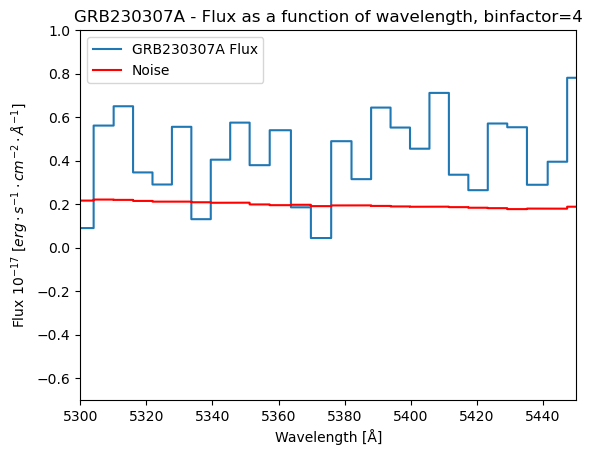

Abs. feature wavelength: 5370.0Å +- 6.0Å


In [16]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 4)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(4))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(5300,5450.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[209], 0)) + "Å +- " + str(round(median_abs_sigma_4, 0)) + "Å") 

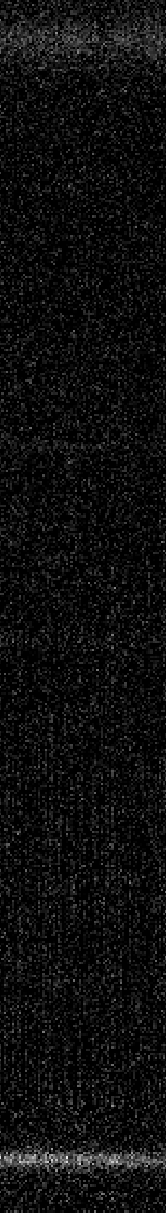

No clear or possibly extremely faint absorption line in 2D spectrum

# ~5550Å

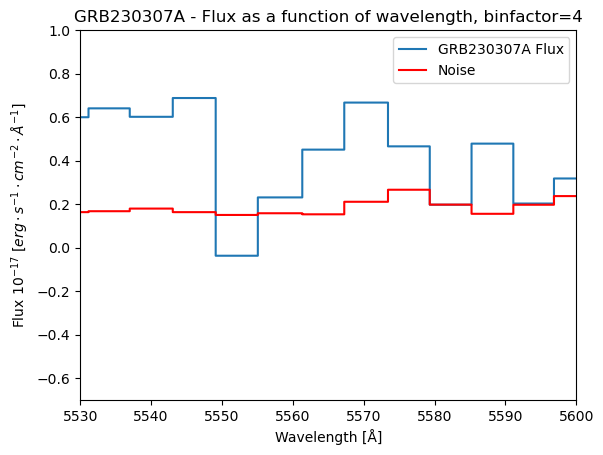

Abs. feature wavelength: 5549.0Å +- 6.0Å


In [17]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 4)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(4))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(5530,5600.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[239], 0)) + "Å +- " + str(round(median_abs_sigma_4, 0)) + "Å") 

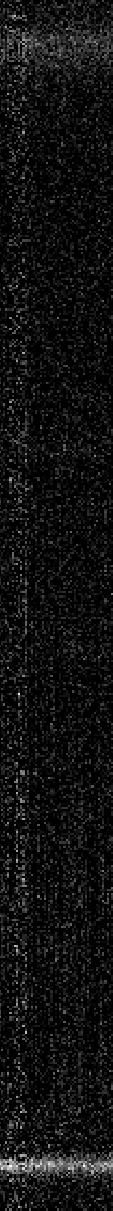

No clear or possibly extremely faint absorption line in 2D spectrum

# ~5625Å

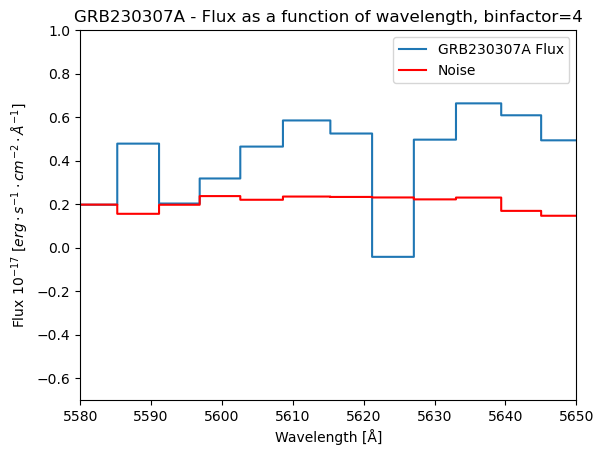

Abs. feature wavelength: 5627.0Å +- 6.0Å


In [18]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 4)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(4))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(5580,5650.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[252], 0)) + "Å +- " + str(round(median_abs_sigma_4, 0)) + "Å") 

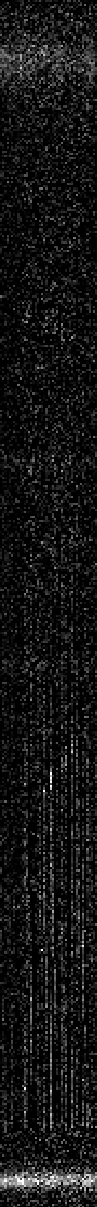

Noisy or potentially telluric origin!

# ~5812Å

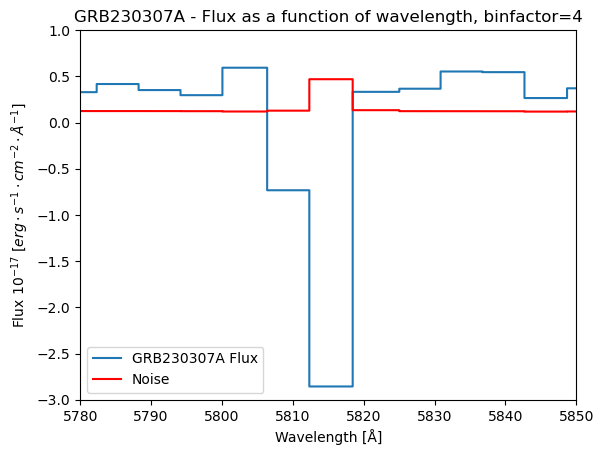

Abs. feature wavelength: 5812Å +- 6.0Å


In [19]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 4)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(4))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(5780,5850.)
plt.ylim(-3,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + "5812Å +- " + str(round(median_abs_sigma_4, 0)) + "Å") 

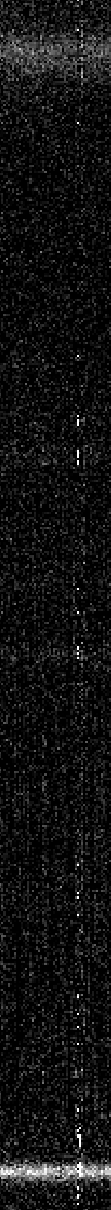

Potential absorption line?

# ~6041Å

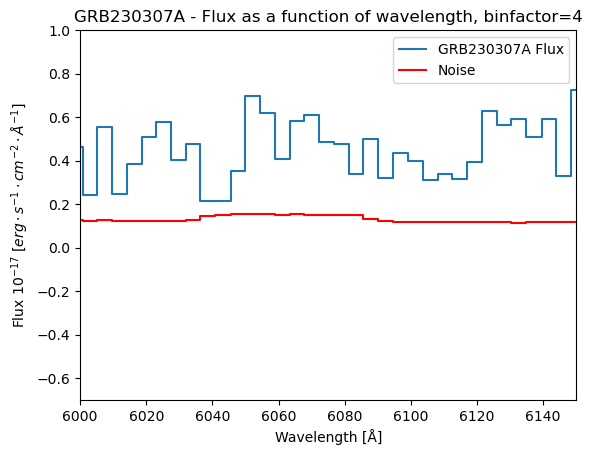

Abs. feature wavelength: 6041.0Å +- 4.0Å


In [20]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(4))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6000,6150.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[428], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

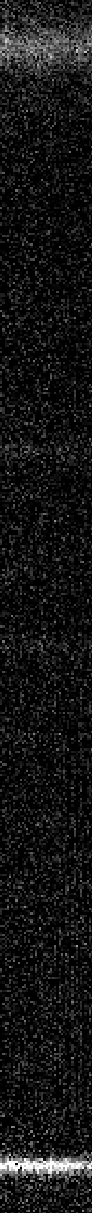

Potential absorption line?

# ~6297Å

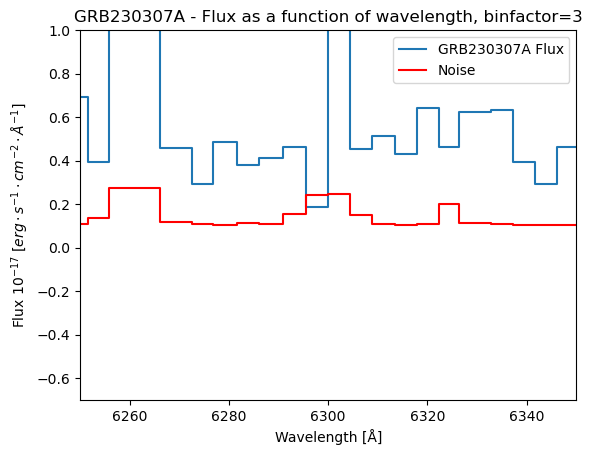

Abs. feature wavelength: 6296.0Å +- 4.0Å


In [21]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6250,6350.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[483], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

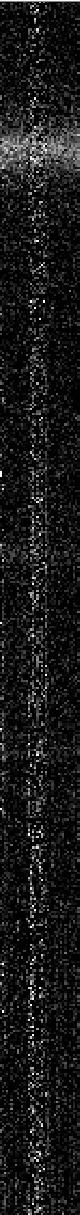

Noisy or telluric origin

# ~6411Å

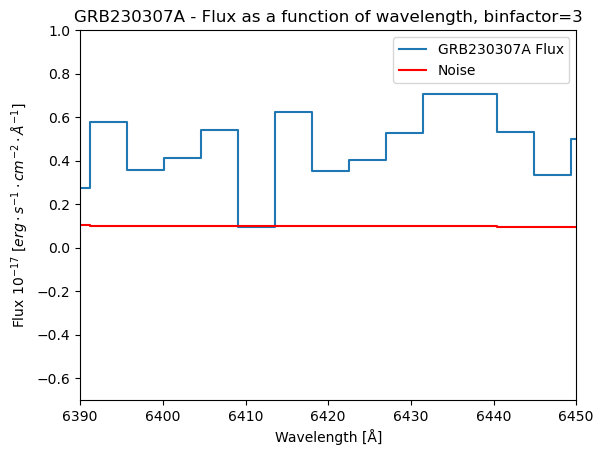

Abs. feature wavelength: 6409.0Å +- 4.0Å


In [22]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6390,6450.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[508], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

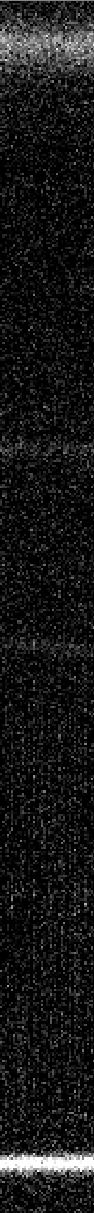

Faint absorption line?

# ~6523Å

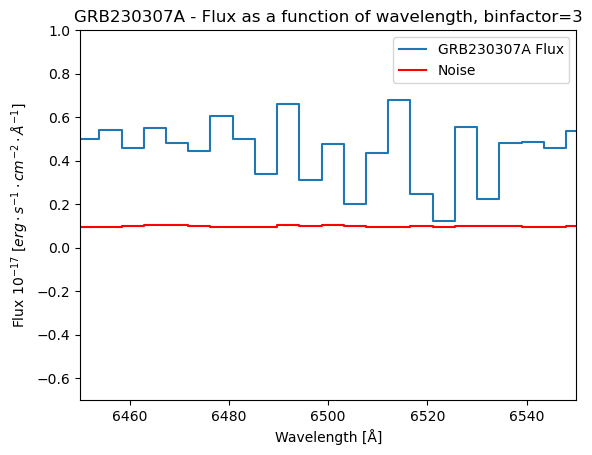

Abs. feature wavelength: 6521.0Å +- 4.0Å


In [23]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6450,6550.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[533], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

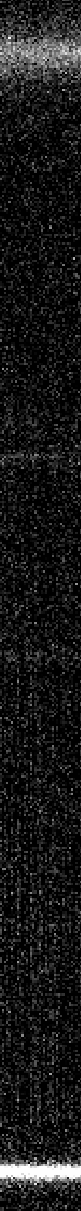

Absorption line?

# ~6594Å

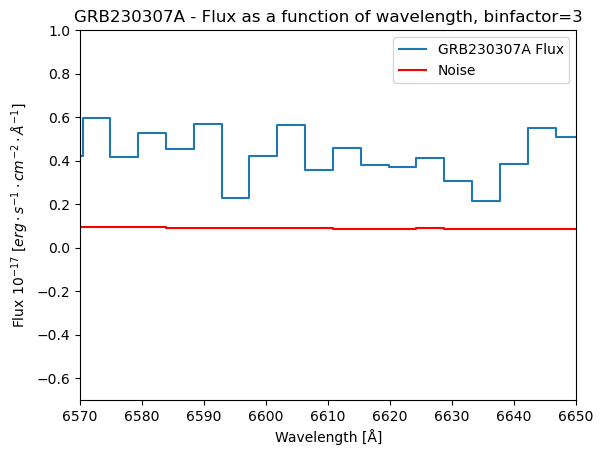

Abs. feature wavelength: 6593.0Å +- 4.0Å


In [24]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6570,6650.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[549], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

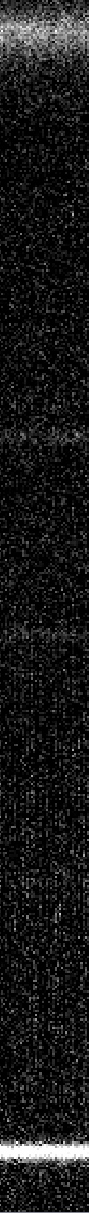

No clear absorption line found in 2D transient spectrum!

# ~6740Å

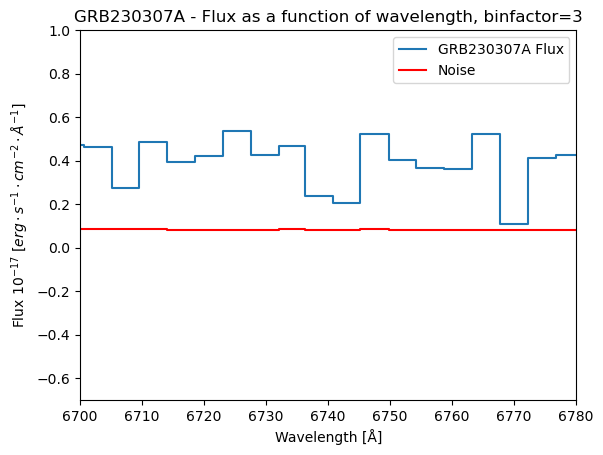

Abs. feature wavelength: 6741.0Å +- 4.0Å


In [25]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6700,6780.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[582], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

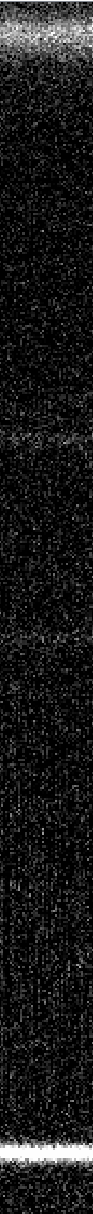

Faint absorption line?

# ~6769Å

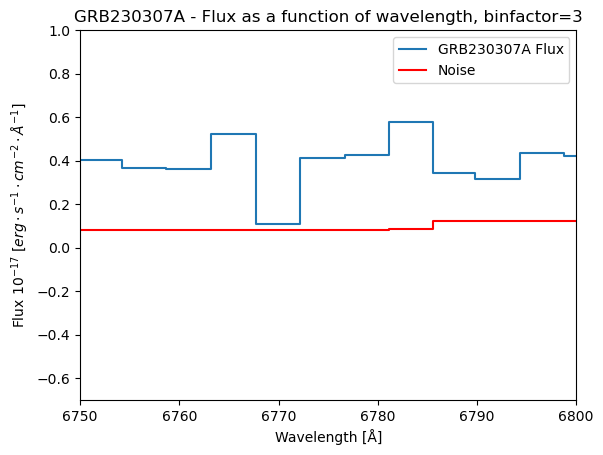

Abs. feature wavelength: 6768.0Å +- 4.0Å


In [26]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6750,6800.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[588], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

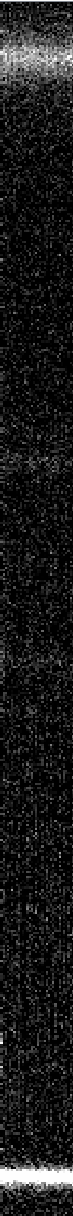

Potentially faint absorption line? (Potentially corresponds to Si IV from A. de Ugarte Postigo et. al)

# ~6823Å

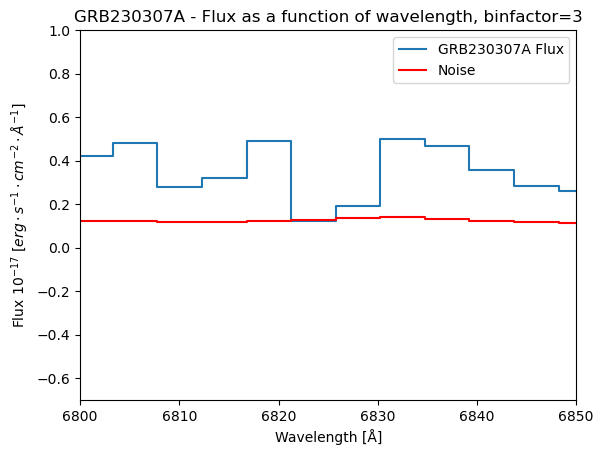

Abs. feature wavelength: 6826.0Å +- 4.0Å


In [27]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6800,6850.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[601], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

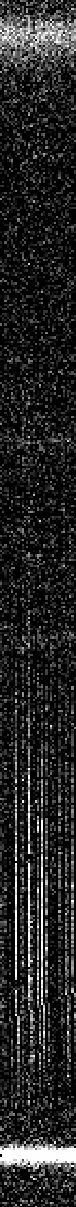

Noisy or telluric origin

# ~6868Å

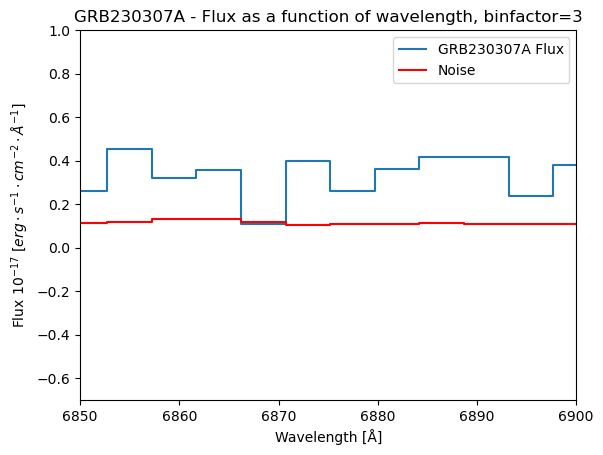

Abs. feature wavelength: 6866.0Å +- 4.0Å


In [28]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6850,6900.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[610], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

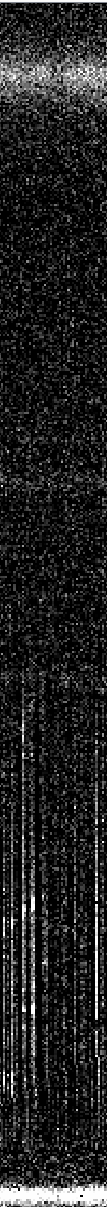

Telluric/noisy, or potential absorption line?

# ~6913Å

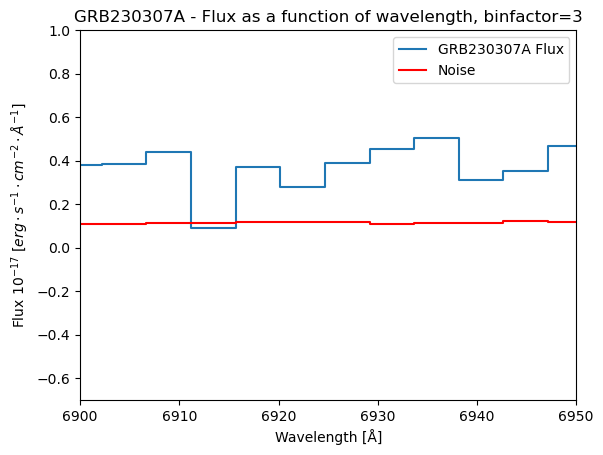

Abs. feature wavelength: 6911.0Å +- 4.0Å


In [29]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(6900,6950.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[620], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

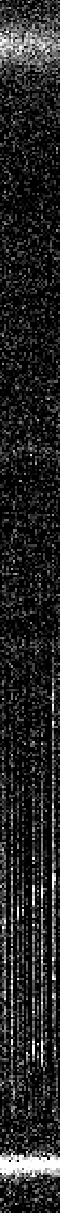

Noisy or telluric origin

# ~7042Å

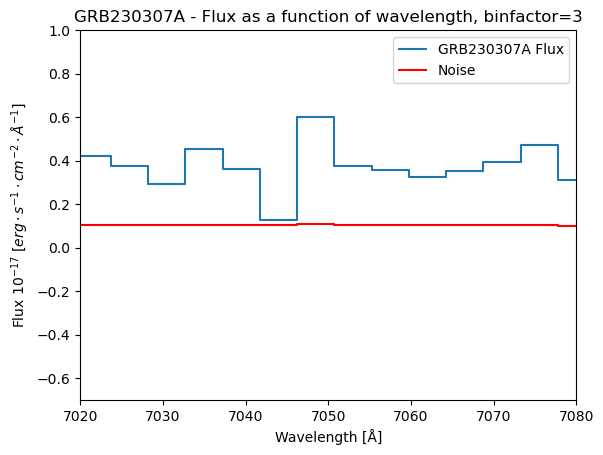

Abs. feature wavelength: 7042.0Å +- 4.0Å


In [30]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(7020,7080.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[649], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

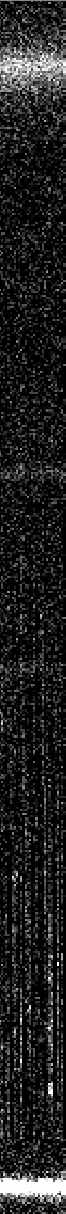

Noisy, telluric or potential absorption line?

# ~7083Å

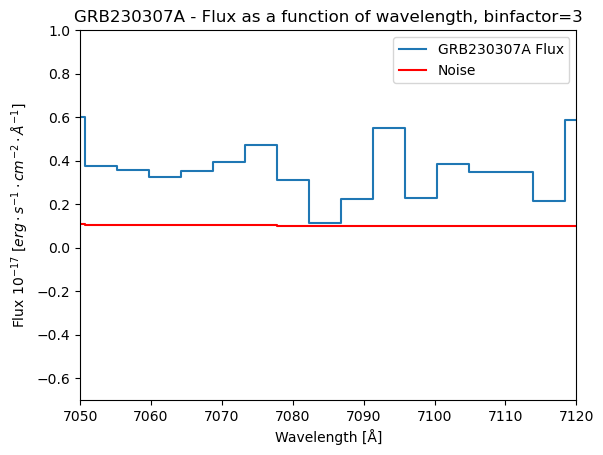

Abs. feature wavelength: 7082.0Å +- 4.0Å


In [31]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(7050,7120.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[658], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

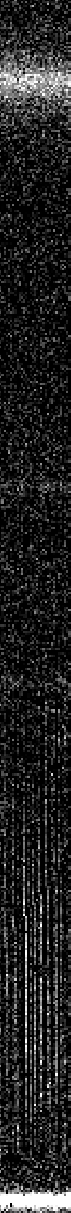

Noisy, telluric or potential absorption line?

# ~7124Å

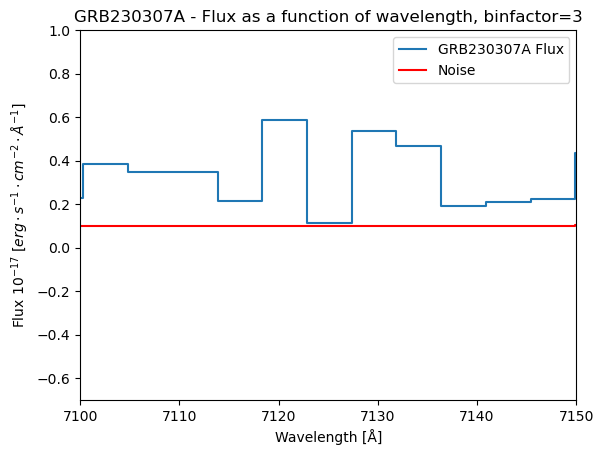

Abs. feature wavelength: 7123.0Å +- 4.0Å


In [32]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(7100,7150.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[667], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

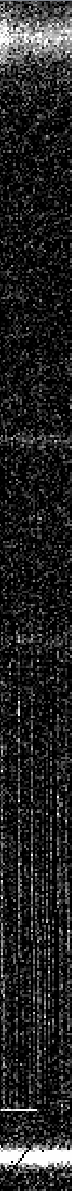

No clear absorption line found in 2D transient spectrum

# ~7177Å

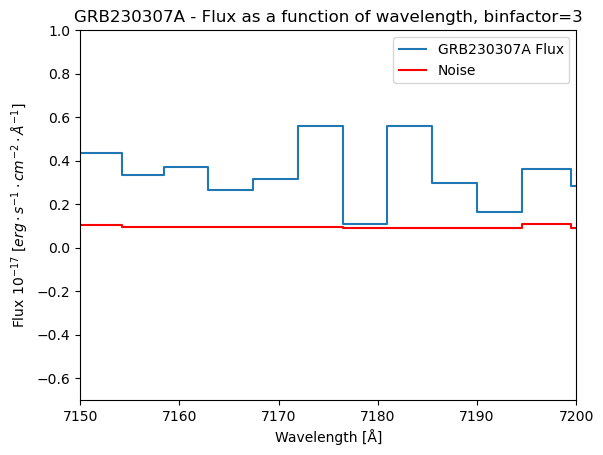

Abs. feature wavelength: 7176.0Å +- 4.0Å


In [33]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(7150,7200.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[679], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

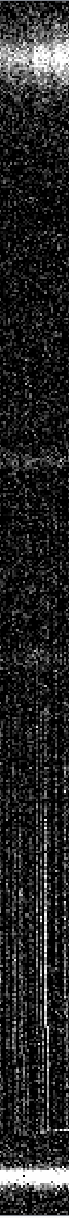

Very faint absorption line, but probably too noisy or telluric origin

# ~7607Å

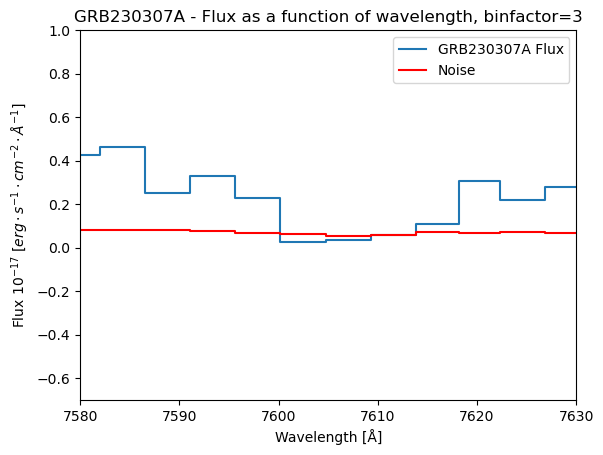

Abs. feature wavelength: 7609.0Å +- 4.0Å


In [34]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(7580,7630.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[775], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

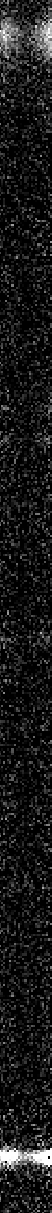

Clear absorption line; Telluric in origin!

# ~8032Å

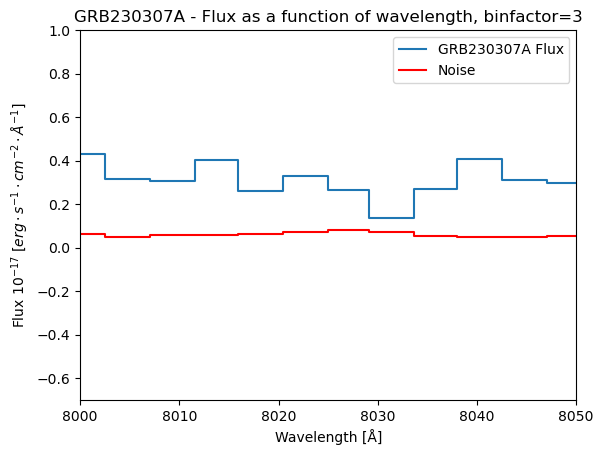

Abs. feature wavelength: 8034.0Å +- 4.0Å


In [35]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(8000,8050.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[868], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

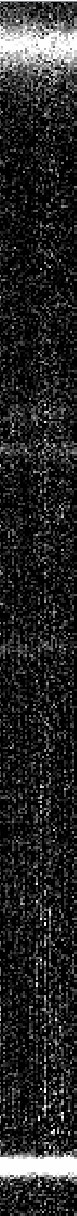

Noisy or telluric in origin

# ~8201Å

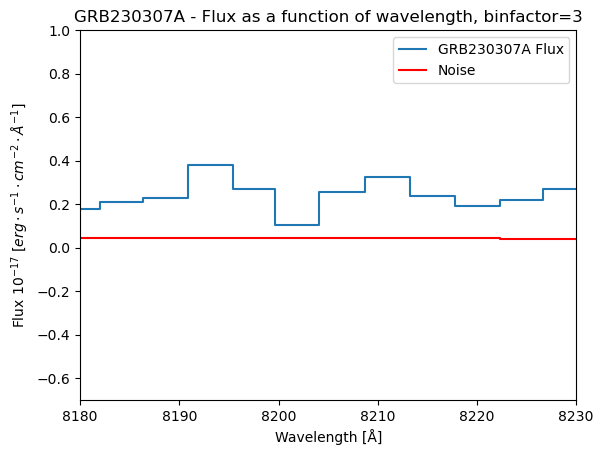

Abs. feature wavelength: 8204.0Å +- 4.0Å


In [36]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(8180,8230.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[906], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

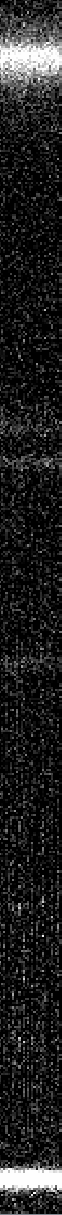

Potentially faint absorption line?

# ~8282Å

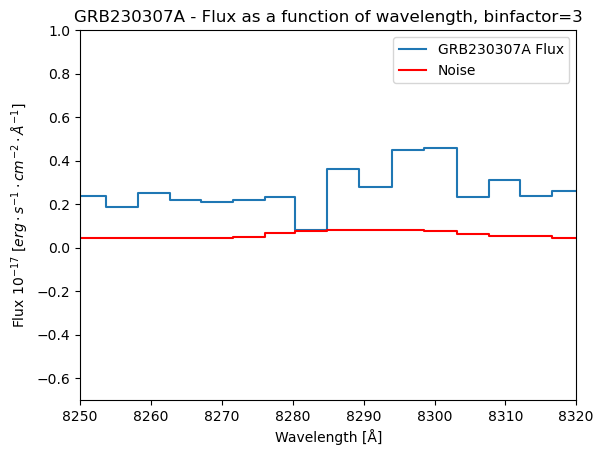

Abs. feature wavelength: 8285.0Å +- 4.0Å


In [37]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(8250,8320.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[924], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

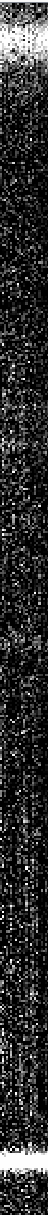

Noisy or telluric origin

# 8358Å

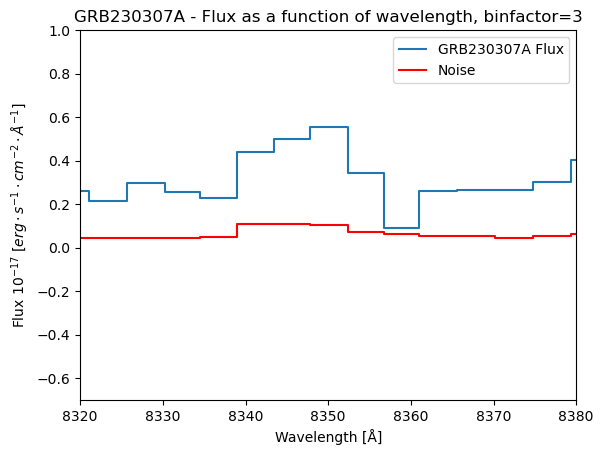

Abs. feature wavelength: 8357.0Å +- 4.0Å


In [38]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(8320,8380.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[940], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

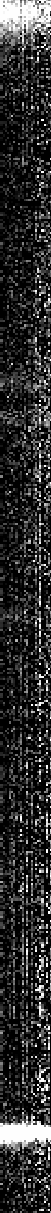

Noisy or telluric origin

# ~8472Å

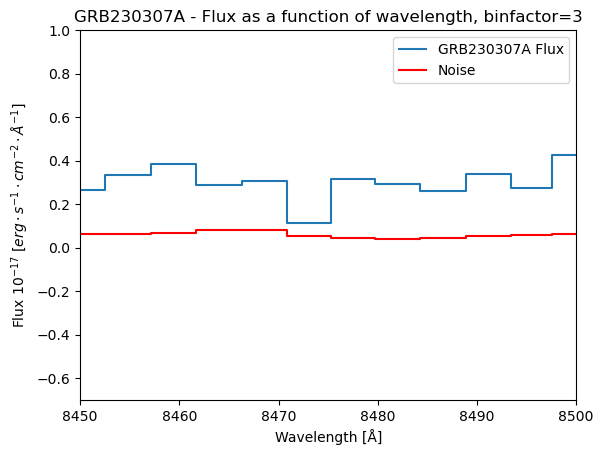

Abs. feature wavelength: 8471.0Å +- 4.0Å


In [39]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(8450,8500.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[965], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

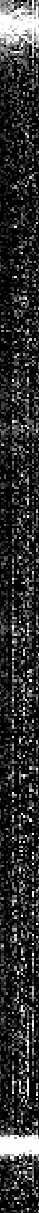

Noisy or telluric origin

# ~8938Å

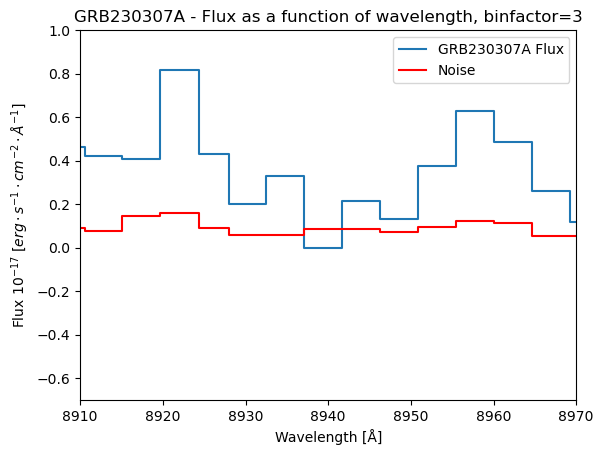

Abs. feature wavelength: 8937.0Å +- 4.0Å


In [40]:
wavebin, fluxbin, noisebin = binner(wave, flux, noise, 3)

plt.figure()

plt.title("GRB230307A - Flux as a function of wavelength, binfactor={}".format(3))
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]") #Arbitrary units
plt.step(wavebin,fluxbin, label="GRB230307A Flux")
plt.step(wavebin,noisebin,color='red', label="Noise")
plt.xlim(8910,8970.)
plt.ylim(-0.7,1.)
plt.legend()
plt.show()

print("Abs. feature wavelength: " + str(round(wavebin[1069], 0)) + "Å +- " + str(round(median_abs_sigma_3, 0)) + "Å") 

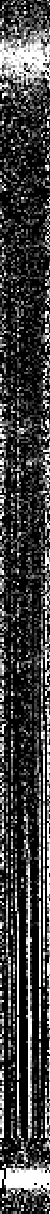

Noisy, telluric or potentially faint absorption line?